In [1]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/wine.csv', header=None);
X = df.iloc[:, :12];
y = df.iloc[:, 12];
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
model = models.Sequential();
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # hidden layer가 2개 들어간 모델

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']);
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25);

C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [5]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,5.801162,0.256608,0.612072,0.620000
1,0.496836,0.775212,0.637132,0.780000
2,0.762339,0.767257,0.733705,0.782308
3,0.748651,0.783680,0.598049,0.805385
4,0.562992,0.818065,0.394992,0.850000


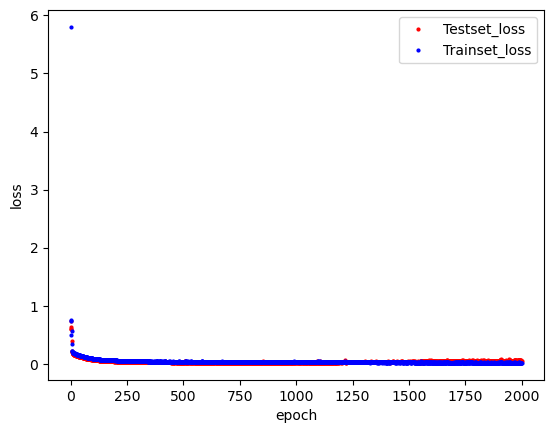

In [6]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()